# Explore here

In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_secret = os.getenv("CLIENT_SECRET")

""" checking if the information is in the code"""

if not client_secret:
    raise ValueError("not the secret")
else:
    print("Good to go on secret")

Good to go on secret


In [ ]:
import datetime as dt

city = "Miami" # the city to get the weather aka longitude
country = "US" #the country living in aka latitude
metric = "imperial" #for F so we dont have to convert it
type_of_data = "forcast" # had issues with is 
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city},{country}&appid={client_secret}&units={metric}"
# this url is for the last 5 day forcast
""" the f string will make it easy to insert the values on website """                         
response = requests.get(url)
data = response.json()
#store my data in the variable data
# test to see if api key works 
if response.status_code == 200:
    print("api key works")
else:
    raise ValueError(f"error go back and figure it out {response.status_code}")

api key works


In [ ]:
#idk what im doing, figure out how to access keys
print(type(data))
print(data.keys()) #these are my keys
print(data['list'][0]['main']) # main is weather values

<class 'dict'>
dict_keys(['cod', 'message', 'cnt', 'list', 'city'])
{'temp': 69.8, 'feels_like': 69.87, 'temp_min': 69.8, 'temp_max': 71.04, 'pressure': 1024, 'sea_level': 1024, 'grnd_level': 1023, 'humidity': 72, 'temp_kf': -0.69}


In [17]:
#data.keys() #top keys
print(data['list'][0].keys())

dict_keys(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain', 'sys', 'dt_txt'])


In [ ]:
#using a function to access the humidity
def get_humidity(data,index=6): # i get it changing index in this context is changing the time/date
    return data['list'][index]['main']['humidity']
# could not fit else statement

for i in range(5): # i can use the range function to acess the five weather reports
    print(i,data['list'][i]['dt_txt'])

humitity = get_humidity(data)
print(humitity)
# or i could just do this
data['list'][0]['main']['humidity'] #0 is my index

0 2026-01-21 18:00:00
1 2026-01-21 21:00:00
2 2026-01-22 00:00:00
3 2026-01-22 03:00:00
4 2026-01-22 06:00:00
84


72

In [ ]:
data['list'][6]['main']

{'temp': 72,
 'feels_like': 72.84,
 'temp_min': 72,
 'temp_max': 72,
 'pressure': 1020,
 'sea_level': 1020,
 'grnd_level': 1020,
 'humidity': 84,
 'temp_kf': 0}

In [28]:
for entry in data['list'][:5]: # i want 5 entrys
    weather = entry['weather'][0]['main']
    temp = entry['main']['temp'] # no need to convert becuase of what in input in the url
    time = entry['dt_txt']
    humitity = entry['main']['humidity']
# somehow this worked and will move it into a pandas

print(f"The weather in {city} is: {weather}")
print(f"The temperture in {city} is: {temp}f")
print(f"the time and date in {city} is: {time}")
print(f"humitity is: {humitity}")

The weather in Miami is: Rain
The temperture in Miami is: 71.73f
the time and date in Miami is: 2026-01-22 06:00:00
humitity is: 83


In [43]:
list = [] # store information here using the function above
for entry in data['list'][:5]:
    list.append({
        "weather": entry['weather'][0]['main'],
        "temp": entry['main']['temp'],
        "date/time": entry['dt_txt'],
        "humidity": entry['main']['humidity']
    })

In [44]:
main_df = pd.DataFrame(list)
main_df.head()


,weather,temp,date/time,humidity
0,Rain,69.80,2026-01-21 18:00:00,72
1,Rain,69.73,2026-01-21 21:00:00,73
2,Rain,68.05,2026-01-22 00:00:00,77
3,Rain,71.35,2026-01-22 03:00:00,84
4,Rain,71.73,2026-01-22 06:00:00,83


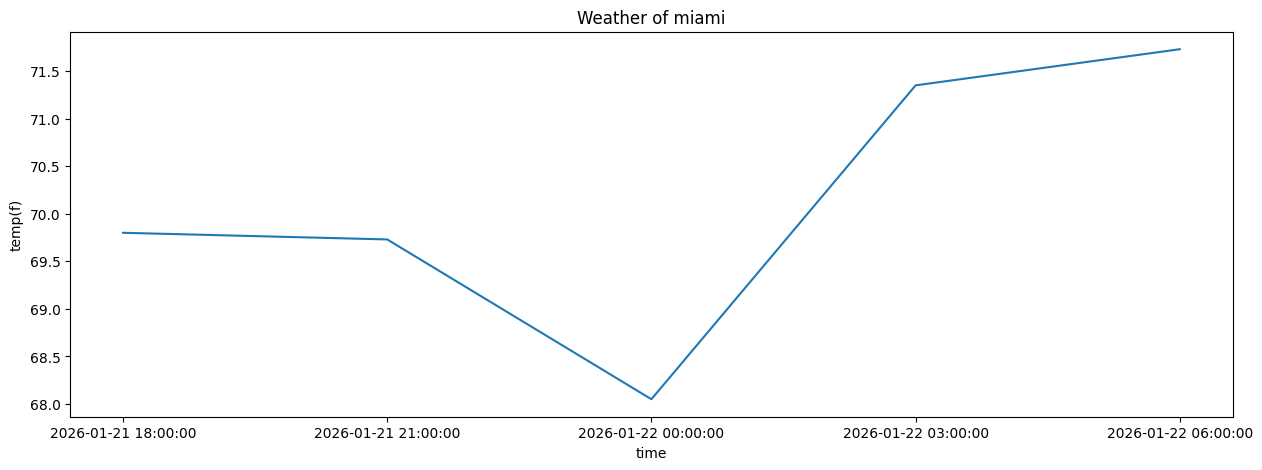

In [46]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.lineplot(x=main_df['date/time'], y=main_df['temp'])
plt.title("Weather of miami")
plt.xlabel("time")
plt.ylabel("temp(f)")
plt.show()

In [10]:
import sqlite3
# this creates data base to sql
conn = sqlite3.connect('main_df', isolation_level=None)

In [11]:
#send data frame to sql 
main_df.to_sql("list", conn, if_exists="replace", index= False)

5

In [12]:
find_data = conn.cursor()
rows = find_data.execute("SELECT * FROM list LIMIT 5").fetchall()
# using this function a lot in this project
for row in rows:
    print(row)

('Rain', 69.8, '2026-01-21 18:00:00')
('Rain', 69.73, '2026-01-21 21:00:00')
('Rain', 68.05, '2026-01-22 00:00:00')
('Rain', 71.35, '2026-01-22 03:00:00')
('Rain', 71.73, '2026-01-22 06:00:00')
